In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip install tf-nightly

In [2]:
import tensorflow as tf

In [3]:
import os
os.chdir("/content/drive/MyDrive/generative_inpaintingv2/checkpoint")

In [113]:
# img_location = '/content/drive/MyDrive/generative_inpaintingv2/image/2048.jpeg'
img_location = '/content/drive/MyDrive/generative_inpaintingv2/image/02.png'
mask_location = "/content/drive/MyDrive/generative_inpaintingv2/mask/mask1.png"
# mask_location = "/content/drive/MyDrive/generative_inpaintingv2/mask/mask3.png"

In [114]:
import cv2
src_img = cv2.imread(img_location)
src_mask = cv2.imread(mask_location)

In [115]:
src_img = cv2.resize(src_img,(512,512))
src_mask = cv2.resize(src_mask,(512,512))

In [ ]:
np.unique(src_mask)

array([  0,   2,   4,  10,  12,  14,  20,  26,  30,  34,  42,  54,  60,
        66,  70,  74,  76,  84,  90,  94,  98, 100, 108, 122, 126, 128,
       137, 141, 145, 147, 149, 153, 157, 163, 181, 187, 195, 197, 201,
       205, 217, 219, 221, 225, 229, 233, 237, 243, 249, 251, 253, 255],
      dtype=uint8)

## Test resize

In [ ]:
import numpy as np

In [ ]:
img_512 = cv2.resize(src_img,(256,256))
mask_512 = cv2.resize(src_mask,(256,256))

In [ ]:
np.unique(np.expand_dims(mask_512>127.5,0))

array([False,  True])

In [ ]:
img_512 = np.expand_dims(img_512,0).astype("float32")
mask_512 = np.expand_dims(mask_512>127.5,0).astype("float32")[:,:,:,0:1]

In [ ]:
# np.unique(mask_512)

array([0., 1.], dtype=float32)

## End test resize

In [116]:
import numpy as np

In [117]:
image = np.expand_dims(src_img,axis = 0)
mask = np.expand_dims(src_mask ,axis = 0)[:,:,:,0:1]

## Preprocess

In [118]:
tflite = tf.lite.Interpreter(model_path="./pre_process.tflite")

In [119]:
input_details = tflite.get_input_details()
output_details = tflite.get_output_details()

In [120]:
input_details

[{'dtype': numpy.float32,
  'index': 0,
  'name': 'input_5',
  'quantization': (0.0, 0),
  'quantization_parameters': {'quantized_dimension': 0,
   'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32)},
  'shape': array([  1, 512, 680,   3], dtype=int32),
  'shape_signature': array([  1, 512, 680,   3], dtype=int32),
  'sparsity_parameters': {}},
 {'dtype': numpy.float32,
  'index': 1,
  'name': 'input_6',
  'quantization': (0.0, 0),
  'quantization_parameters': {'quantized_dimension': 0,
   'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32)},
  'shape': array([  1, 512, 680,   1], dtype=int32),
  'shape_signature': array([  1, 512, 680,   1], dtype=int32),
  'sparsity_parameters': {}},
 {'dtype': numpy.float32,
  'index': 2,
  'name': 'input_7',
  'quantization': (0.0, 0),
  'quantization_parameters': {'quantized_dimension': 0,
   'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32)},
  'shape': array([1, 1], dt

In [121]:
# input_details
tflite.resize_tensor_input(
    input_details[0]['index'], (1, 512, 512, 3))
tflite.resize_tensor_input(
    input_details[1]['index'], (1, 512, 512, 1))

In [122]:
tflite.allocate_tensors()

In [ ]:
np.unique( (mask > 0.5).astype("float32"))

array([0., 1.], dtype=float32)

In [ ]:
np.unique(mask)

array([  0, 255], dtype=uint8)

In [123]:
tflite.set_tensor(input_details[0]['index'],image.astype("float32"))
tflite.set_tensor(input_details[1]['index'], mask.astype("float32"))
tflite.set_tensor(input_details[2]['index'], np.array([[1]]).astype("float32"))
tflite.set_tensor(input_details[3]['index'], np.array([[512]]).astype("float32"))

In [124]:
import time
a = time.time()
tflite.invoke()
b = time.time()
print(b-a)

0.04369068145751953


In [125]:
img_large = tflite.get_tensor(output_details[0]['index']) 
mask_large = tflite.get_tensor(output_details[1]['index']) 
img_512 = tflite.get_tensor(output_details[2]['index']) 
mask_512 = tflite.get_tensor(output_details[3]['index']) 

In [17]:
# np.unique(mask_large[0])

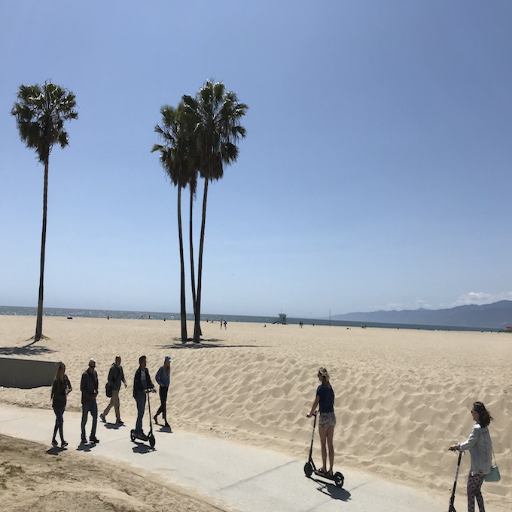

In [126]:
from google.colab.patches import cv2_imshow
cv2_imshow(img_large[0])

## CR -Model

In [127]:
import tensorflow as tf
# cr = tf.lite.Interpreter(model_path="/content/drive/MyDrive/cr/crfill/networks/cr_mask_wise_hi_fill_new.tflite")
cr = tf.lite.Interpreter(model_path="/content/drive/MyDrive/cr/crfill/networks/cr_origin_high_res.tflite")

In [128]:
input_details = cr.get_input_details()
output_details = cr.get_output_details()

In [ ]:
input_details

In [130]:
cr.resize_tensor_input(
    input_details[0]['index'], (1, 512, 512, 3))
cr.resize_tensor_input(
    input_details[1]['index'], (1, 512, 512, 1))
cr.resize_tensor_input(
    input_details[2]['index'], (1, 512, 512, 1))

In [131]:
cr.allocate_tensors()

In [132]:
# img_512_cr = np.expand_dims(img_512,0)

In [133]:
# image_cr = img_512 / 127.5 - 1

In [134]:
np.unique( (mask_512 > 0.5).astype("float32"))

array([0., 1.], dtype=float32)

In [ ]:
np.unique(mask_512)

array([0.        , 0.00392151], dtype=float32)

In [135]:
# cr.set_tensor(input_details[0]['index'],image_cr * (1-mask_512 ))
cr.set_tensor(input_details[0]['index'],img_512)
cr.set_tensor(input_details[1]['index'], (mask_512 > 0.5).astype("float32") )
cr.set_tensor(input_details[2]['index'], tf.ones_like(mask_512))

In [136]:
cr.invoke()

In [137]:
output1 = cr.get_tensor(output_details[0]['index']) 

In [138]:
output2 = cr.get_tensor(output_details[1]['index']) 

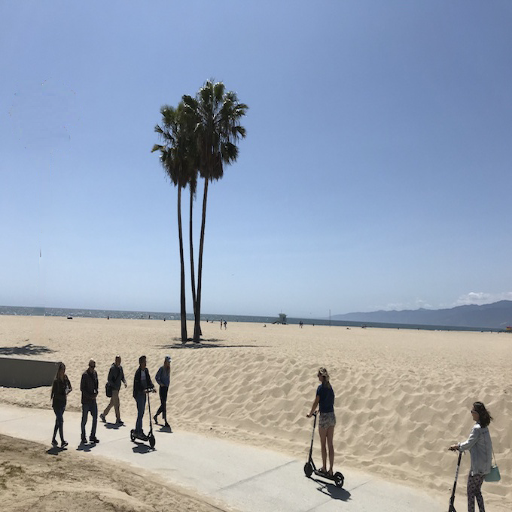

In [139]:
from google.colab.patches import cv2_imshow
cv2_imshow(output1[0])

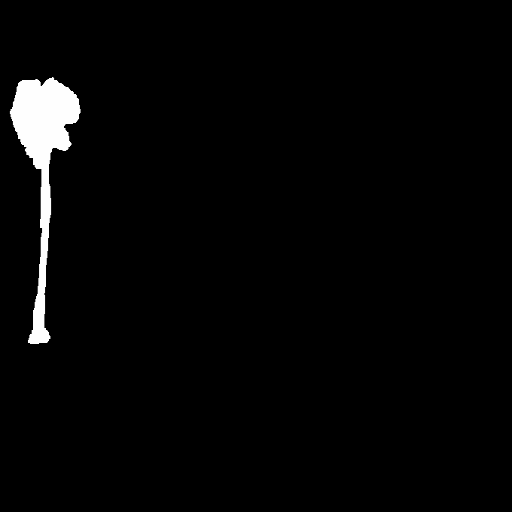

In [140]:
from google.colab.patches import cv2_imshow
cv2_imshow(mask_512[0]*255)

## Contextual

In [141]:
import tensorflow as tf
contextual = tf.lite.Interpreter(model_path="/content/drive/MyDrive/cr/crfill/networks/contextual_1.tflite")

In [142]:
input_details = contextual.get_input_details()
output_details = contextual.get_output_details()

In [143]:
input_details


[{'dtype': numpy.float32,
  'index': 0,
  'name': 'input_1',
  'quantization': (0.0, 0),
  'quantization_parameters': {'quantized_dimension': 0,
   'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32)},
  'shape': array([ 1, 64, 64, 96], dtype=int32),
  'shape_signature': array([-1, 64, 64, 96], dtype=int32),
  'sparsity_parameters': {}},
 {'dtype': numpy.float32,
  'index': 1,
  'name': 'input_2',
  'quantization': (0.0, 0),
  'quantization_parameters': {'quantized_dimension': 0,
   'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32)},
  'shape': array([  1, 256, 256,   1], dtype=int32),
  'shape_signature': array([ -1, 256, 256,   1], dtype=int32),
  'sparsity_parameters': {}},
 {'dtype': numpy.float32,
  'index': 2,
  'name': 'input_3',
  'quantization': (0.0, 0),
  'quantization_parameters': {'quantized_dimension': 0,
   'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32)},
  'shape': array([1, 1], dtype=int3

In [144]:
contextual.resize_tensor_input(
    input_details[0]['index'], (1, 128, 128, 96))
contextual.resize_tensor_input(
    input_details[1]['index'], (1, 512, 512, 1))

In [145]:
contextual.allocate_tensors()

In [146]:
contextual.set_tensor(input_details[0]['index'],output2)
contextual.set_tensor(input_details[1]['index'], (mask_512 > 0.5).astype("float32"))
contextual.set_tensor(input_details[2]['index'], np.array([[32]]).astype(np.float32))
contextual.set_tensor(input_details[3]['index'], np.array([[32]]).astype(np.float32))

In [147]:
contextual.invoke()

In [148]:
output = contextual.get_tensor(output_details[0]['index']) 

In [149]:
x2 = output1

## Post process

In [150]:
import tensorflow as tf
# post_process = tf.lite.Interpreter(model_path="post_process.tflite")
post_process = tf.lite.Interpreter(model_path="post_process_fix_mask.tflite")


In [151]:
input_details = post_process.get_input_details()
output_details = post_process.get_output_details()

In [152]:
input_details

[{'dtype': numpy.float32,
  'index': 0,
  'name': 'input_1',
  'quantization': (0.0, 0),
  'quantization_parameters': {'quantized_dimension': 0,
   'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32)},
  'shape': array([  1, 512, 512,   3], dtype=int32),
  'shape_signature': array([  1, 512, 512,   3], dtype=int32),
  'sparsity_parameters': {}},
 {'dtype': numpy.float32,
  'index': 1,
  'name': 'input_2',
  'quantization': (0.0, 0),
  'quantization_parameters': {'quantized_dimension': 0,
   'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32)},
  'shape': array([  1, 512, 512,   1], dtype=int32),
  'shape_signature': array([  1, 512, 512,   1], dtype=int32),
  'sparsity_parameters': {}},
 {'dtype': numpy.float32,
  'index': 2,
  'name': 'input_3',
  'quantization': (0.0, 0),
  'quantization_parameters': {'quantized_dimension': 0,
   'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32)},
  'shape': array([  1, 256,

In [153]:
# post_process.resize_tensor_input(
#     input_details[0]['index'], (1, 2048, 2048, 3))
# post_process.resize_tensor_input(
#     input_details[1]['index'], (1, 2048, 2048, 3))
# post_process.resize_tensor_input(
#     input_details[2]['index'], (1, 2048, 2048, 1))
# post_process.resize_tensor_input(
#     input_details[3]['index'], (1, 512, 512, 3))
# post_process.resize_tensor_input(
#     input_details[4]['index'], (1, 512, 512, 3))
# post_process.resize_tensor_input(
#     input_details[5]['index'], (1, 512, 512, 1))
# post_process.resize_tensor_input(
#     input_details[6]['index'], (1, 32, 32, 1024))

post_process.resize_tensor_input(
    input_details[0]['index'], (1, 512, 512, 3))
post_process.resize_tensor_input(
    input_details[1]['index'], (1, 512, 512, 1))
post_process.resize_tensor_input(
    input_details[2]['index'], (1, 512, 512, 3))
post_process.resize_tensor_input(
    input_details[3]['index'], (1, 512, 512, 3))
post_process.resize_tensor_input(
    input_details[4]['index'], (1, 512, 512, 1))
post_process.resize_tensor_input(
    input_details[5]['index'], (1, 32, 32, 1024))

In [154]:
post_process.allocate_tensors()

In [155]:
# post_process.set_tensor(input_details[0]['index'],image.astype("float32"))
# post_process.set_tensor(input_details[1]['index'], img_large)
# post_process.set_tensor(input_details[2]['index'], mask_large)
# post_process.set_tensor(input_details[3]['index'], x2)
# post_process.set_tensor(input_details[4]['index'], img_512)
# post_process.set_tensor(input_details[5]['index'], mask_512)
# post_process.set_tensor(input_details[6]['index'], output)
# post_process.set_tensor(input_details[7]['index'], np.array([[4]]).astype("float32"))
# post_process.set_tensor(input_details[8]['index'],  np.array([[512]]).astype("float32"))
# post_process.set_tensor(input_details[9]['index'], np.array([[32]]).astype("float32"))
# post_process.set_tensor(input_details[10]['index'], np.array([[2048]]).astype("float32"))
# post_process.set_tensor(input_details[11]['index'], np.array([[2048]]).astype("float32"))

post_process.set_tensor(input_details[0]['index'], img_large)
post_process.set_tensor(input_details[1]['index'], mask_large)
post_process.set_tensor(input_details[2]['index'], x2)
post_process.set_tensor(input_details[3]['index'], img_512)
post_process.set_tensor(input_details[4]['index'], mask_512)
post_process.set_tensor(input_details[5]['index'], output)
post_process.set_tensor(input_details[6]['index'], np.array([[1]]).astype("float32"))
post_process.set_tensor(input_details[7]['index'],  np.array([[512]]).astype("float32"))
post_process.set_tensor(input_details[8]['index'], np.array([[32]]).astype("float32"))
post_process.set_tensor(input_details[9]['index'], np.array([[512]]).astype("float32"))
post_process.set_tensor(input_details[10]['index'], np.array([[512]]).astype("float32"))

In [59]:
# np.unique(img_large)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [156]:
post_process.invoke()

In [157]:
# post_output = post_process.get_tensor(output_details[0]['index']) 

In [158]:
post_output1 = post_process.get_tensor(output_details[0]['index']) 
post_output2 = post_process.get_tensor(output_details[1]['index']) 
output2 = post_output1*post_output2 +  image *(1-post_output2)

In [159]:
np.unique(post_output1)

array([  0.,   1.,   2., ..., 253., 254., 255.], dtype=float32)

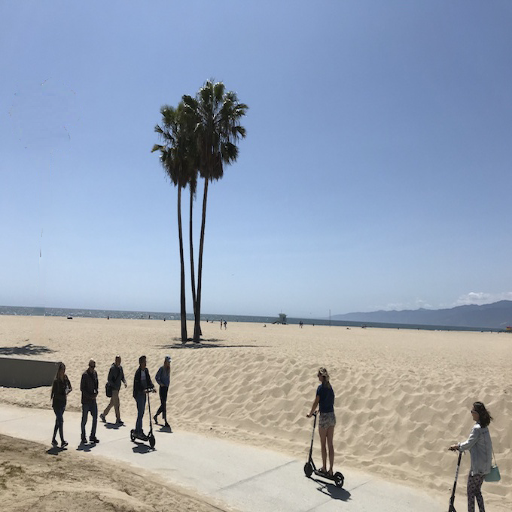

In [160]:
from google.colab.patches import cv2_imshow
cv2_imshow(output2[0])

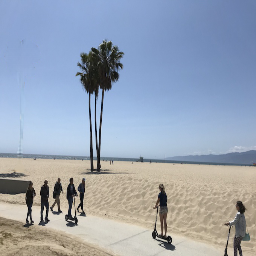

In [57]:
from google.colab.patches import cv2_imshow
cv2_imshow(output1[0])

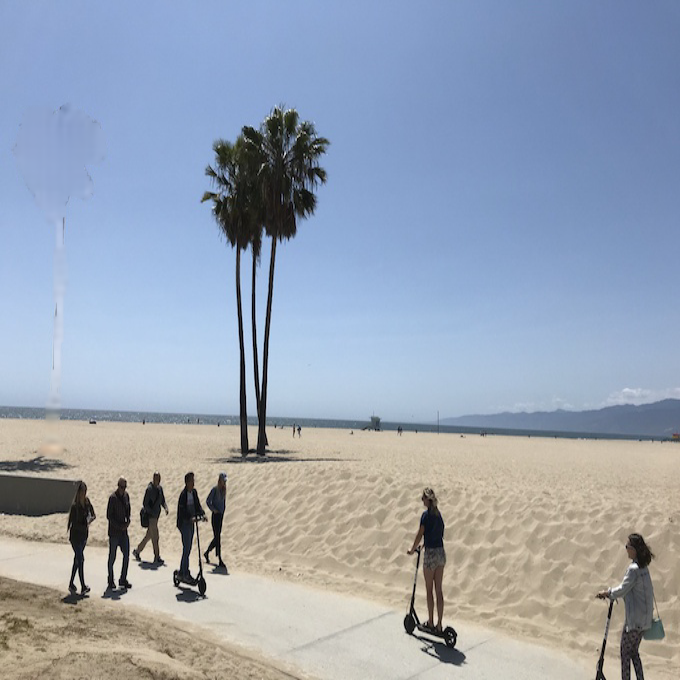

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(post_output[0])